In [67]:
from functions import *
from scipy import signal, ndimage

lunar = './data/lunar/test/data/S12_GradeB'
lunar_2 = './data/lunar/test/data/S15_GradeA'
lunar_3 = './data/lunar/test/data/S15_GradeB'
lunar_4 = './data/lunar/test/data/S16_GradeA'
lunar_5 = './data/lunar/test/data/S16_GradeB'
mars = './data/mars/test/data'
earth = './data/EARTH/EARTH/'


In [29]:
def get_index_from_f(arrf,fval):
    tol = 1.5e-3
    aux = abs(arrf - fval)
    index = np.where(aux<tol)
    return int(index[0])

In [32]:
def hist_convolve_spectrogram(sxx, Nconvs, frequencies):
    conv = sxx/sxx.max()
    kernel = np.ones((10, 10))
    for i in range(Nconvs):
        conv = ndimage.convolve(conv, kernel, mode='nearest')
        conv = conv/conv.max()
        
    hist = np.sum(conv/conv.max(), axis=0)
    hist /= hist.max()
    return hist , conv

Cantidad de datos en el directorio ./data/lunar/test/data/S12_GradeB : 64
df:  6.625
Picos encontrados en los tiempos: [ 7632.1509434  26644.52830189 43943.09433962 64626.26415094
 73529.35849057 83835.01886792]
Amplitud del pico (CFT): [1.60760748 1.31159819 1.60044042 1.5020984  1.96745352 1.34485274]
Pico en tiempo 7632.1509433962265 tiene una confianza de [0.20]
Pico en tiempo 26644.528301886792 tiene una confianza de [0.24]
Pico en tiempo 43943.09433962264 tiene una confianza de [0.51]
Pico en tiempo 64626.264150943396 tiene una confianza de [0.33]
Pico en tiempo 73529.35849056604 tiene una confianza de [1.00]
Pico en tiempo 83835.01886792453 tiene una confianza de [0.30]
Indices de los Picos  [ 50563 176520 291123 428149 487132 555407]
Tiempos de los Picos  [ 7632.1509434  26644.52830189 43943.09433962 64626.26415094
 73529.35849057 83835.01886792]


C:\Users\danie\AppData\Local\Temp\ipykernel_13644\2814787709.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(index[0])


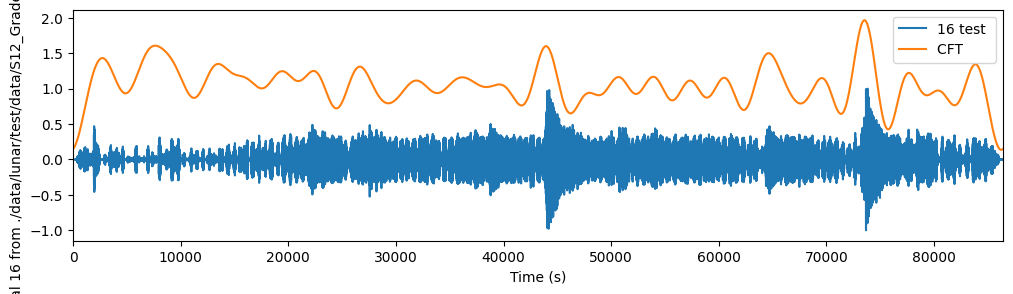

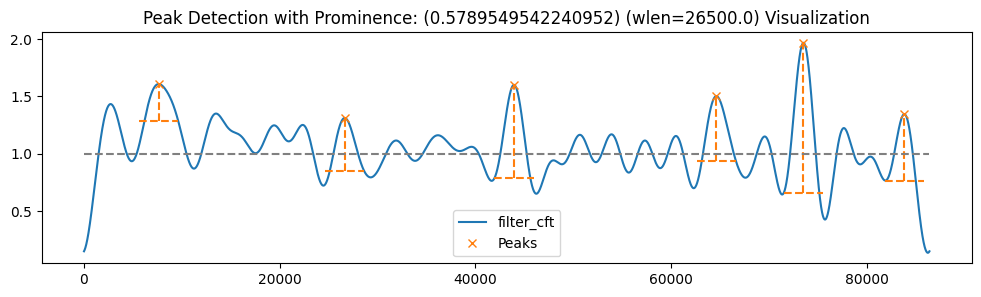

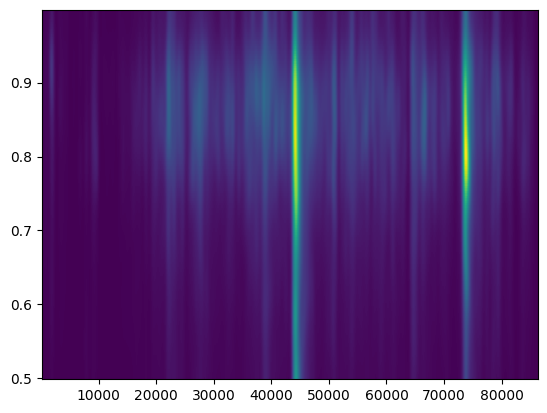

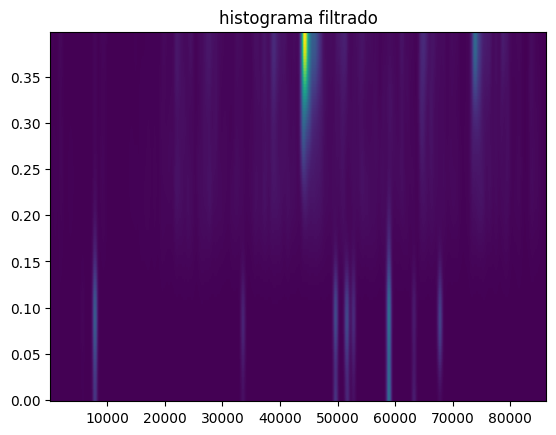

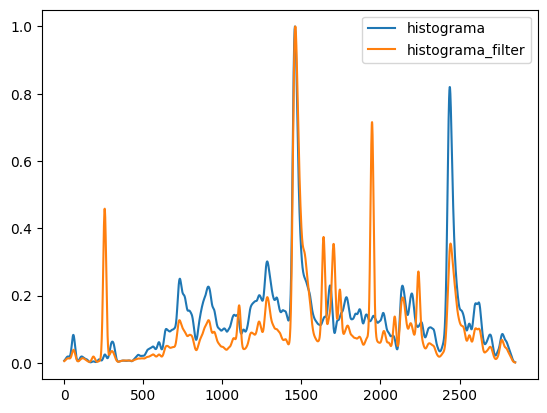

Picos encontrados en los tiempos: [44196.22641509 73750.94339623]
Amplitud del pico (CFT): [1.         0.81988148]
Pico en tiempo 44196.22641509434 tiene una confianza de [1.00]
Pico en tiempo 73750.94339622642 tiene una confianza de [0.70]
Picos encontrados en los tiempos: [ 7879.24528302 33539.62264151 44256.60377358 49660.37735849
 51562.26415094 58928.30188679 67773.58490566 73901.88679245]
Amplitud del pico (CFT): [0.45820848 0.17083273 1.         0.37422342 0.35347009 0.71550185
 0.27145635 0.35448311]
Pico en tiempo 7879.245283018868 tiene una confianza de [0.30]
Pico en tiempo 33539.622641509435 tiene una confianza de [0.03]
Pico en tiempo 44256.6037735849 tiene una confianza de [1.00]
Pico en tiempo 49660.377358490565 tiene una confianza de [0.15]
Pico en tiempo 51562.264150943396 tiene una confianza de [0.12]
Pico en tiempo 58928.301886792455 tiene una confianza de [0.71]
Pico en tiempo 67773.58490566038 tiene una confianza de [0.08]
Pico en tiempo 73901.88679245283 tiene una

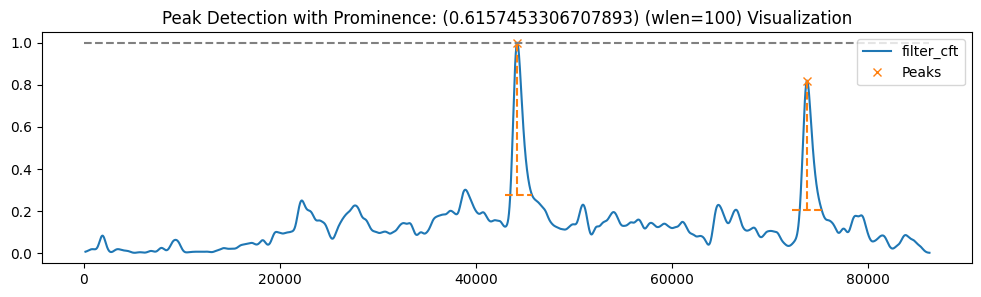

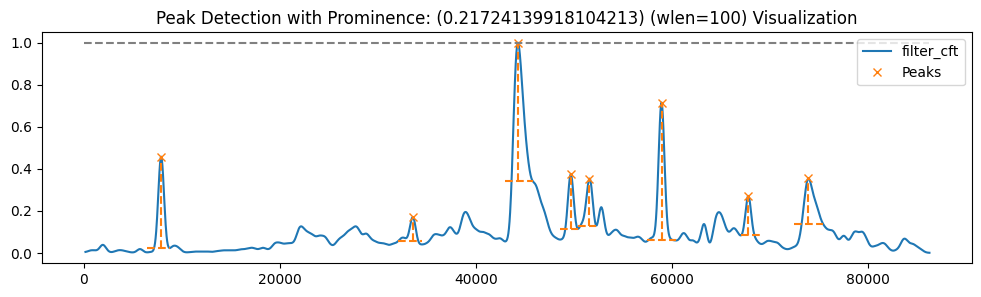

In [143]:
#sospechosos = [12,18, 9, 2] lunar
#sospechosos_lunar_2 = [3]
id = 16#np.random.randint(0,63)#18
data_directory = lunar
tr_times, tr_data_filt_norm, df, tr_data= data_extrac_test(id, data_directory=data_directory)
#tr_times=tr_times[:90000]
#tr_data= tr_data[:90000]
#tr_data_filt_norm=tr_data_filt_norm[:90000]
print('df: ', df)
cft = CFT(tr_data_filt_norm, df)#, 10,50)
filtered_cft_real = fourier_filter(cft)
# Plot raw data 
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(tr_times, tr_data_filt_norm, label=f'{id} test ')
ax.plot(tr_times, filtered_cft_real, label=f'CFT ')
ax.set_xlim([min(tr_times),max(tr_times)])

#ax.axvline(x = arrival, color='red',label='Rel. Arrival')


#ax.axvline(x = max_pos, color='green')#,label='Rel. Arrival')
#ax.set_xlim([72000,76000])
ax.set_xlabel('Time (s)')
ax.set_ylabel(f'Signal {id} from {data_directory} function')
ax.legend()

peaks, properties = peaks_plot(tr_times, filtered_cft_real, prominence=0.25, distance=5000*df, wlen_value=4000*df, height=1.0)
#def confianza(signal, peaks):
index_peaks= peaks
time_peaks= tr_times[peaks]

print('Indices de los Picos ', index_peaks)
print('Tiempos de los Picos ', time_peaks)

#Proximamente valores de confianza
confianza=np.zeros(len(peaks))
frequencies, times, sxx = signal.spectrogram(tr_data, df, nperseg=2000, noverlap=1800) ##argumentos de resolucion en frequencies y tiempo

#sxx = sxx[:,np.where(frequencies>0.5)]
#print(np.where(frequencies>0.5))


low_index = get_index_from_f(frequencies, 0.5)
up_index = get_index_from_f(frequencies, 1)
up_index_filter = get_index_from_f(frequencies, 0.4)

#filter test
sxx_filter = sxx[:up_index_filter, :]
frequencies_filter = frequencies[:up_index_filter]

#Filter
sxx= sxx[low_index:up_index, :]
frequencies= frequencies[low_index:up_index]

hist_filter, conv_filter = hist_convolve_spectrogram(sxx_filter, 10, frequencies_filter)
hist, conv = hist_convolve_spectrogram(sxx, 10, frequencies)
plt.show()
plt.pcolormesh(times,frequencies,conv)
plt.show()

plt.pcolormesh(times,frequencies_filter, conv_filter)
plt.title('histograma filtrado')
plt.show()


plt.plot(hist, label='histograma')
plt.plot(hist_filter, label='histograma_filter')

plt.legend()

plt.show()

_, properties = peaks_plot(times, hist, prominence=hist.mean(), distance=10, wlen_value=100, height=0.0)
_, properties = peaks_plot(times, hist_filter, prominence=hist_filter.mean(), distance=10, wlen_value=100, height=0.0)
plt.show()


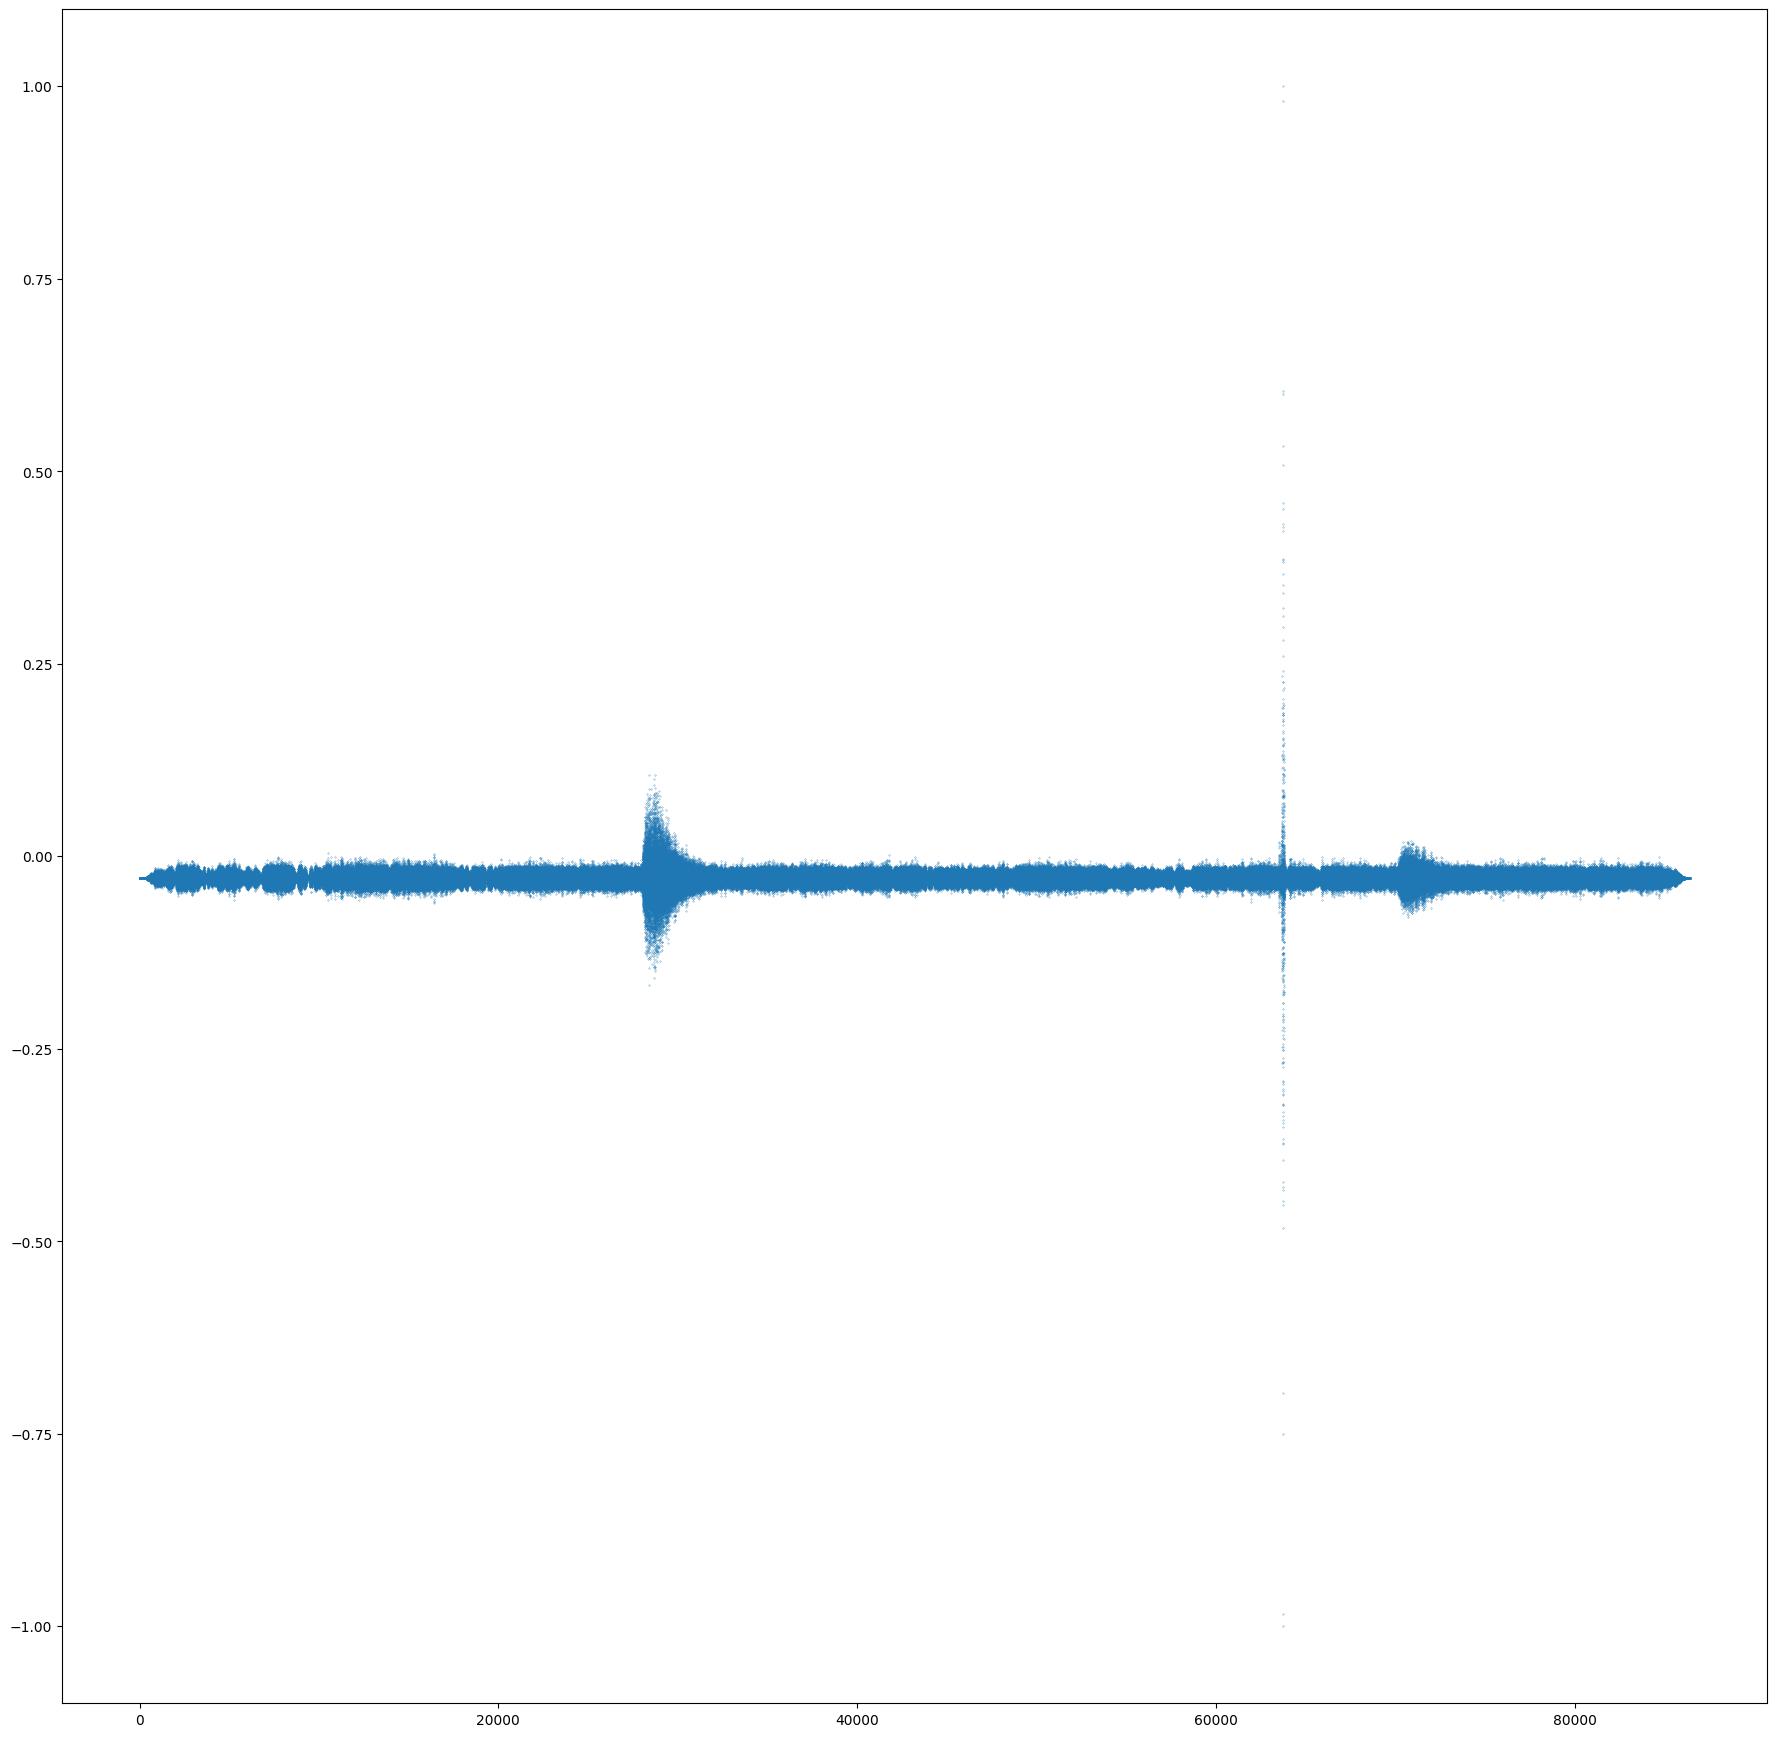

In [114]:
for i in range(len(tr_data)):
    